<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1:Andrés Oñate
- Nombre de alumno 2: Javier Zapata

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/andresignacio-o/MDS7202)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Miercoles a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [2]:
df = pd.read_csv("energia_homero.csv")
df.head()


,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [3]:
#pasar date a datetime
df['date'] = pd.to_datetime(df['date'])
df

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195
...,...,...
1493,2020-07-03,39.659
1494,2020-07-04,38.071
1495,2020-07-05,36.565
1496,2020-07-06,39.900


In [4]:
#serie de tiempo con plotly
fig = px.line(df, x='date', y='Energy_kWh', title='Consumo de energía a lo largo del tiempo')
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [5]:
#CODIGO AQUI

# 0. Separar conjunto de entrenamiento y prueba

# Entrenamiento: hasta el 2020-02-29
train = df[df['date'] <= '2020-02-29']

# Prueba: desde el 2020-03-01
test = df[df['date'] >= '2020-03-01']

# Mostrar tamaños para confirmar
print("Tamaño entrenamiento:", len(train))
print("Tamaño prueba:", len(test))


Tamaño entrenamiento: 1369
Tamaño prueba: 129


In [6]:
# 1. Pipeline para capturar la tendencia con modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Transformador: convertir la fecha en número (por ejemplo, días desde el inicio)
def date_to_ordinal(X):
    return np.array([x.toordinal() for x in X]).reshape(-1, 1)

# Crear el Pipeline
Pipeline_trend = Pipeline([
    ('fechas', FunctionTransformer(date_to_ordinal, validate=False)),
    ('modelo', LinearRegression())
])


MAE (entrenamiento): 10.568154088025523
MAE (prueba): 8.655813997873553


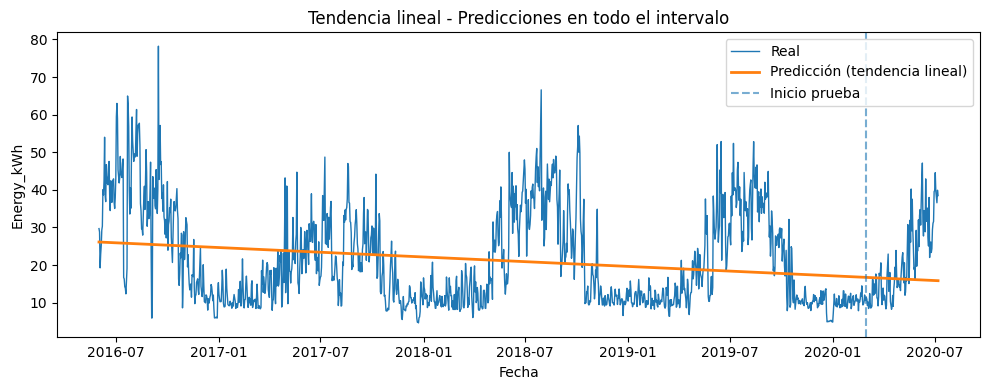

In [7]:
# 2. Entrenar el modelo lineal, predecir (train y test) y calcular MAE
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Ajustar el pipeline con los datos de entrenamiento
Pipeline_trend.fit(train['date'], train['Energy_kWh'])

# Predicciones en TODO el intervalo (train + test)
df['pred_trend'] = Pipeline_trend.predict(df['date'])

# MAE en train y test
mae_train = mean_absolute_error(train['Energy_kWh'], df.loc[train.index, 'pred_trend'])
mae_test  = mean_absolute_error(test['Energy_kWh'],  df.loc[test.index,  'pred_trend'])

print("MAE (entrenamiento):", mae_train)
print("MAE (prueba):", mae_test)

# Gráfico: valores reales vs. predicción de tendencia
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['Energy_kWh'], label='Real', linewidth=1)
plt.plot(df['date'], df['pred_trend'], label='Predicción (tendencia lineal)', linewidth=2)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle='--', alpha=0.6, label='Inicio prueba')
plt.title('Tendencia lineal - Predicciones en todo el intervalo')
plt.xlabel('Fecha')
plt.ylabel('Energy_kWh')
plt.legend()
plt.tight_layout()
plt.show()


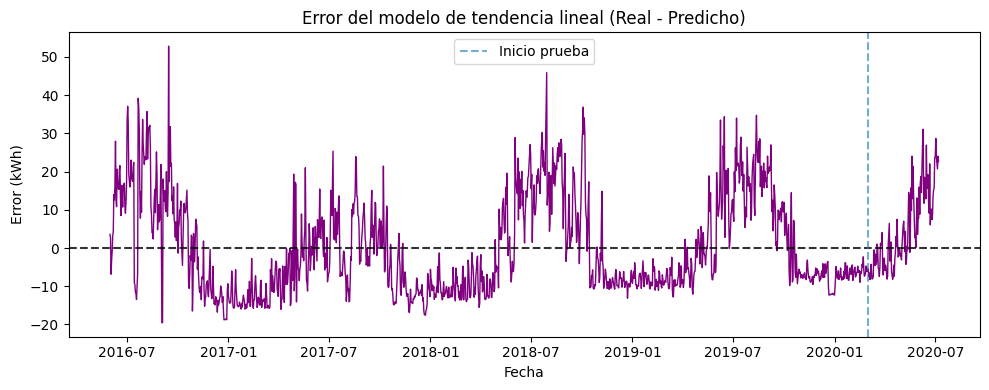

In [11]:
# 3. Graficar el error (Valor real - Valor predicho)
df['error_trend'] = df['Energy_kWh'] - df['pred_trend']

plt.figure(figsize=(10,4))
plt.plot(df['date'], df['error_trend'], color='purple', linewidth=1)
plt.axhline(0, color='black', linestyle='--', alpha=0.8)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle='--', alpha=0.6, label='Inicio prueba')
plt.title('Error del modelo de tendencia lineal (Real - Predicho)')
plt.xlabel('Fecha')
plt.ylabel('Error (kWh)')
plt.legend()
plt.tight_layout()
plt.show()


```text
Al observar el gráfico del error, se aprecia que existen fluctuaciones periódicas a lo largo del tiempo, con aumentos y disminuciones regulares en ciertos intervalos. Esto indica que la serie presenta un comportamiento estacional, ya que el modelo lineal solo capta la tendencia general pero no logra representar las variaciones cíclicas que se repiten. Por lo tanto, el error muestra una estructura no aleatoria, evidenciando que hay patrones estacionales en el consumo energético del hogar.
Se pueden observar particularmente entorno a los meses de enero una baja en el consumo con respecto a los meses de entorno a Julio (seguramente homero utiliza aire acondicionado en el verano del hemisferio norte y no hace tanto frio en Springfield en invierno esos meses meses).
```

In [8]:
# 4. Pipeline para estacionalidad con términos de Fourier + Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Elegimos periodo anual (en días) y pocos términos de Fourier
P = 365.25   # periodo ~anual (energía del hogar suele tener fuerte estacionalidad por clima)
n = 5        # número de términos de Fourier (sencillo, evita sobreajuste)

def fourier_features(dates, P=365.25, n=5):
    # convertir fechas a número (días) y centrar en el primer día
    t = np.array([d.toordinal() for d in dates])
    t = t - t.min()
    # construir matriz [sin(2πkt/P), cos(2πkt/P)] para k=1..n
    X = []
    for k in range(1, n+1):
        X.append(np.sin(2*np.pi*k*t/P))
        X.append(np.cos(2*np.pi*k*t/P))
    return np.column_stack(X)

Pipeline_seasonal = Pipeline([
    ('fourier', FunctionTransformer(fourier_features, kw_args={'P': P, 'n': n}, validate=False)),
    ('modelo', LinearRegression())
])


MAE estacional (entrenamiento): 5.388602286790836
MAE estacional (prueba): 4.223635654120978


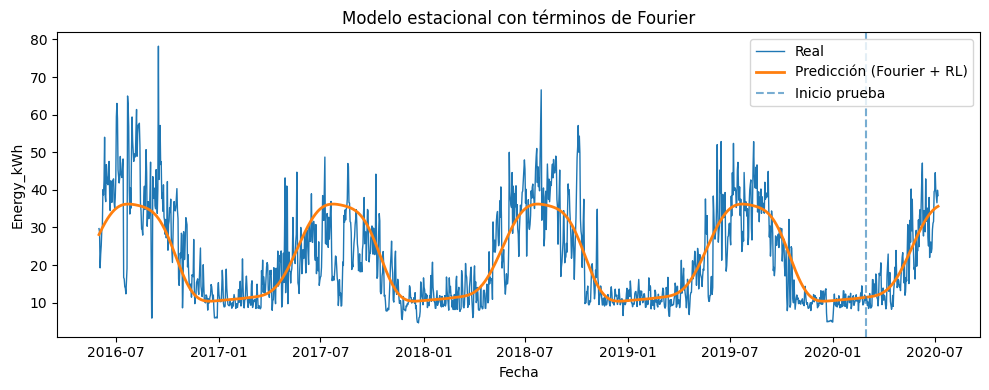

In [9]:
# 5. Entrenamiento y evaluación del modelo estacional con Fourier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

# Ajustar SOLO con entrenamiento
Pipeline_seasonal.fit(train['date'], train['Energy_kWh'])

# Predicciones en todo el intervalo (train + test)
df['pred_seasonal'] = Pipeline_seasonal.predict(df['date'])

# MAE en train y test
mae_train_seasonal = mean_absolute_error(train['Energy_kWh'], df.loc[train.index, 'pred_seasonal'])
mae_test_seasonal  = mean_absolute_error(test['Energy_kWh'],  df.loc[test.index,  'pred_seasonal'])

print("MAE estacional (entrenamiento):", mae_train_seasonal)
print("MAE estacional (prueba):", mae_test_seasonal)

# Gráfico: valores reales vs. predicción estacional
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['Energy_kWh'], label='Real', linewidth=1)
plt.plot(df['date'], df['pred_seasonal'], label='Predicción (Fourier + RL)', linewidth=2)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle='--', alpha=0.6, label='Inicio prueba')
plt.title('Modelo estacional con términos de Fourier')
plt.xlabel('Fecha')
plt.ylabel('Energy_kWh')
plt.legend()
plt.tight_layout()
plt.show()


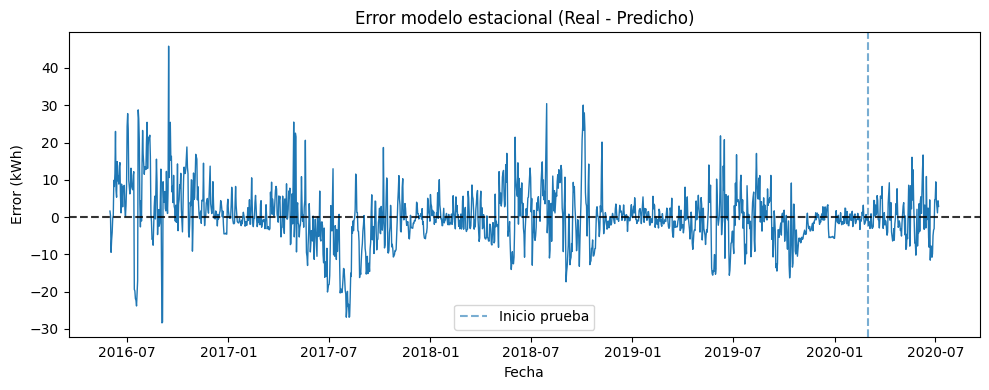

In [14]:
# 6. Error del modelo estacional (Real - Predicho) y gráfico
df['error_seasonal'] = df['Energy_kWh'] - df['pred_seasonal']

plt.figure(figsize=(10,4))
plt.plot(df['date'], df['error_seasonal'], linewidth=1)
plt.axhline(0, color='black', linestyle='--', alpha=0.8)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle='--', alpha=0.6, label='Inicio prueba')
plt.title('Error modelo estacional (Real - Predicho)')
plt.xlabel('Fecha')
plt.ylabel('Error (kWh)')
plt.legend()
plt.tight_layout()
plt.show()


```text

Con los términos de Fourier el error queda centrado alrededor de 0 y se reduce la estructura periódica que aparecía con la sola tendencia lineal. Aún quedan picos aislados (ruido o eventos no estacionales), pero en general la estacionalidad principal queda bien representada y el MAE mejora en train y test respecto al modelo de tendencia pura.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [16]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.2 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [10]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



**Respuesta:**

In [11]:
#CODIGO AQUI

#Renombrar

train_p = train[['date', 'Energy_kWh']].rename(columns={'date':'ds', 'Energy_kWh':'y'}).copy()
test_p  = test[['date', 'Energy_kWh']].rename(columns={'date':'ds', 'Energy_kWh':'y'}).copy()


In [12]:
# 2. Modelo Prophet: estacionalidad anual y semanal activadas (simple)
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(train_p)  # solo con entrenamiento

# Preparar horizonte igual al tamaño del set de prueba
future = m.make_future_dataframe(periods=len(test_p), freq='D')  # asumo frecuencia diaria
forecast = m.predict(future)  # predicciones para todo el período (train + test)


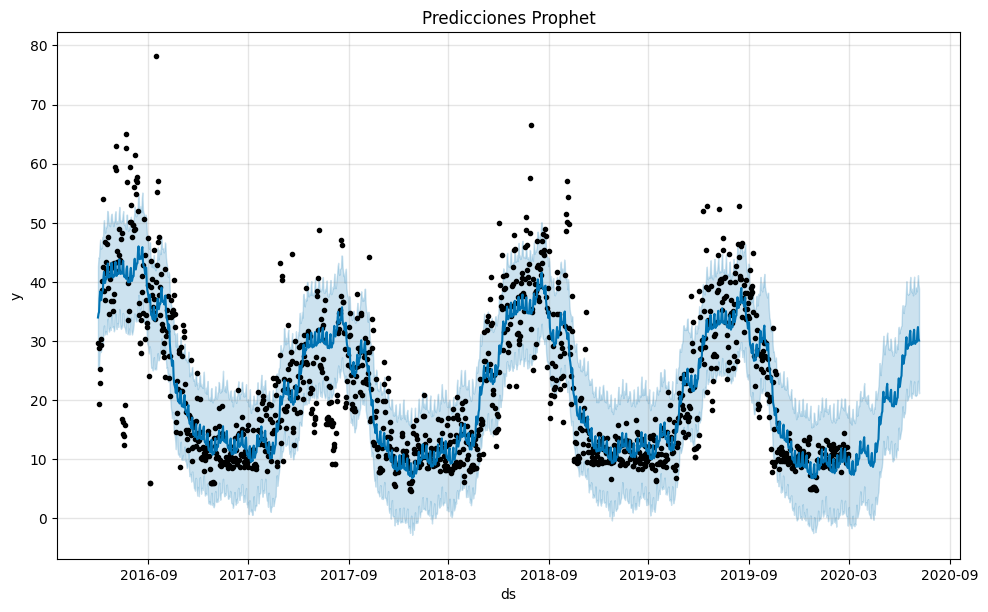

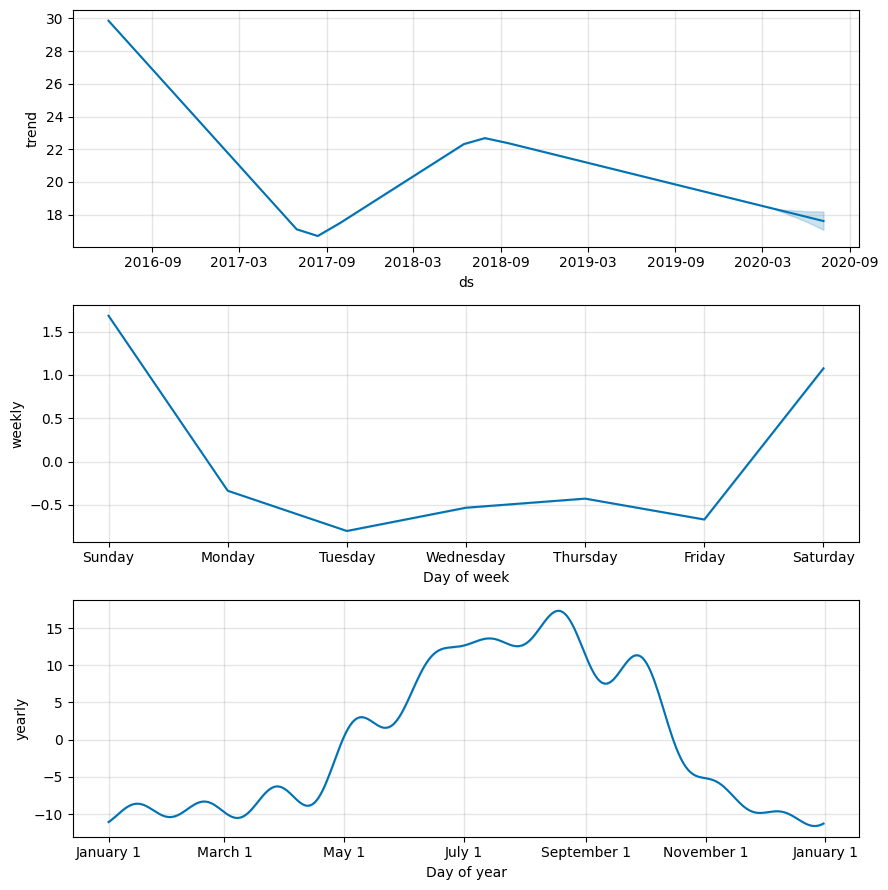

In [13]:
# 3. Gráficos básicos de Prophet
m.plot(forecast)
plt.title('Predicciones Prophet')
plt.show()

m.plot_components(forecast)
plt.show()


In [14]:
# 4. MAE en train y test (usando yhat)
f = forecast.set_index('ds')

# Alinear por fechas de cada conjunto
yhat_train = f.loc[train_p['ds'], 'yhat'].values
yhat_test  = f.loc[test_p['ds'],  'yhat'].values

mae_train_prophet = mean_absolute_error(train_p['y'].values, yhat_train)
mae_test_prophet  = mean_absolute_error(test_p['y'].values,  yhat_test)

print("MAE Prophet (entrenamiento):", mae_train_prophet)
print("MAE Prophet (prueba):", mae_test_prophet)


MAE Prophet (entrenamiento): 4.819944798045753
MAE Prophet (prueba): 4.955838164620662


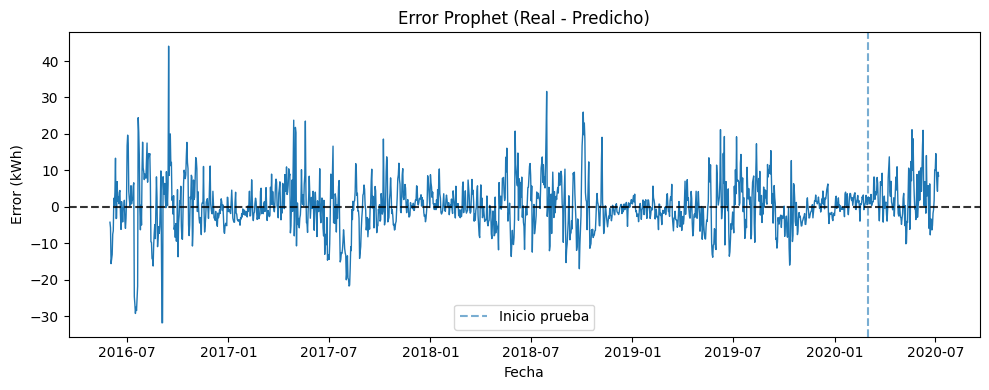

In [15]:
# 5. Error en todo el intervalo (solo donde hay y real)
full_y = pd.concat([train_p, test_p], ignore_index=True).set_index('ds')
full_plot = full_y.join(f[['yhat']], how='left')
full_plot['error'] = full_plot['y'] - full_plot['yhat']

plt.figure(figsize=(10,4))
plt.plot(full_plot.index, full_plot['error'], linewidth=1)
plt.axhline(0, color='black', linestyle='--', alpha=0.8)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle='--', alpha=0.6, label='Inicio prueba')
plt.title('Error Prophet (Real - Predicho)')
plt.xlabel('Fecha')
plt.ylabel('Error (kWh)')
plt.legend()
plt.tight_layout()
plt.show()


```text

En el gráfico del error se observa que los valores se mantienen oscilando alrededor de cero sin un patrón periódico marcado. Esto indica que el modelo ya logró capturar correctamente la estacionalidad principal del consumo energético.
A diferencia del modelo lineal simple, aquí no se aprecian repeticiones cíclicas evidentes en el error, lo que sugiere que Prophet modeló la estacionalidad anual y semanal de forma adecuada. Los errores que quedan parecen deberse a fluctuaciones puntuales o ruido no explicado, más que a un comportamiento estacional residual.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [16]:
#CODIGO AQUI

df_frink = pd.read_csv("datos_frink.csv")
df_frink['date'] = pd.to_datetime(df_frink['date'])
datos_frink = df_frink[['date', 'Temp_avg', 'Hum_avg', 'Wind_avg']].copy()

df_merge = df.merge(datos_frink, on='date')
df_merge[['Energy_kWh', 'Temp_avg', 'Hum_avg', 'Wind_avg']].corr()


,Energy_kWh,Temp_avg,Hum_avg,Wind_avg
Energy_kWh,1.000000,0.720178,-0.022245,-0.209835
Temp_avg,0.720178,1.000000,0.105836,-0.142861
Hum_avg,-0.022245,0.105836,1.000000,0.061033
Wind_avg,-0.209835,-0.142861,0.061033,1.000000


In [17]:
# Leer y preparar los datos meteorológicos
df_frink = pd.read_csv("datos_frink.csv")
df_frink['date'] = pd.to_datetime(df_frink['date'])

# Unir con tu dataframe principal de consumo
df_merge = df.merge(df_frink, on='date')

# Mostrar la matriz completa de correlaciones
corr = df_merge.corr(numeric_only=True)

#Mostar top 5 con mayor correlación absoluta con 'Energy_kWh'
corr_energy = corr['Energy_kWh'].abs().sort_values(ascending=False)
top_10 = corr_energy.head(10)  # Incluye 'Energy_kWh'

top_10




Energy_kWh       1.000000
pred_seasonal    0.798518
Temp_avg         0.720178
Temp_max         0.710673
Temp_min         0.705234
Dew_min          0.645126
Dew_avg          0.634184
Dew_max          0.606610
Press_max        0.385739
Press_avg        0.291159
Name: Energy_kWh, dtype: float64

```text
Dados los resultados de la correlación, se observa que la temperatura y el punto de rocio son los que mayores correlación tiene, se usaran estos valores promedios para agregarlos como regresores al modelo Prophet. Los promedios porque representan mejor el comportamiento diario general que los valores máximos o mínimos.
Luego como se vio antes, la velocidad del viento tiene una correlación negativa moderada, por lo que también se incluirá como regresor en el modelo.



In [18]:

# Seleccionar las variables que usaremos
datos_frink = df_frink[['date', 'Temp_avg', 'Dew_avg', 'Wind_avg']].copy()

# Unir con los datos de consumo
df_merge = df.merge(datos_frink, on='date')

# Separar en train y test según la misma regla anterior
train_merge = df_merge[df_merge['date'] <= '2020-02-29']
test_merge  = df_merge[df_merge['date'] >= '2020-03-01']

# Renombrar para Prophet
train_p = train_merge.rename(columns={'date':'ds', 'Energy_kWh':'y'})
test_p  = test_merge.rename(columns={'date':'ds', 'Energy_kWh':'y'})


In [19]:
# Crear el modelo Prophet y agregar regresores
m_reg = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

m_reg.add_regressor('Temp_avg')
m_reg.add_regressor('Dew_avg')
m_reg.add_regressor('Wind_avg')

# Entrenar el modelo
m_reg.fit(train_p)


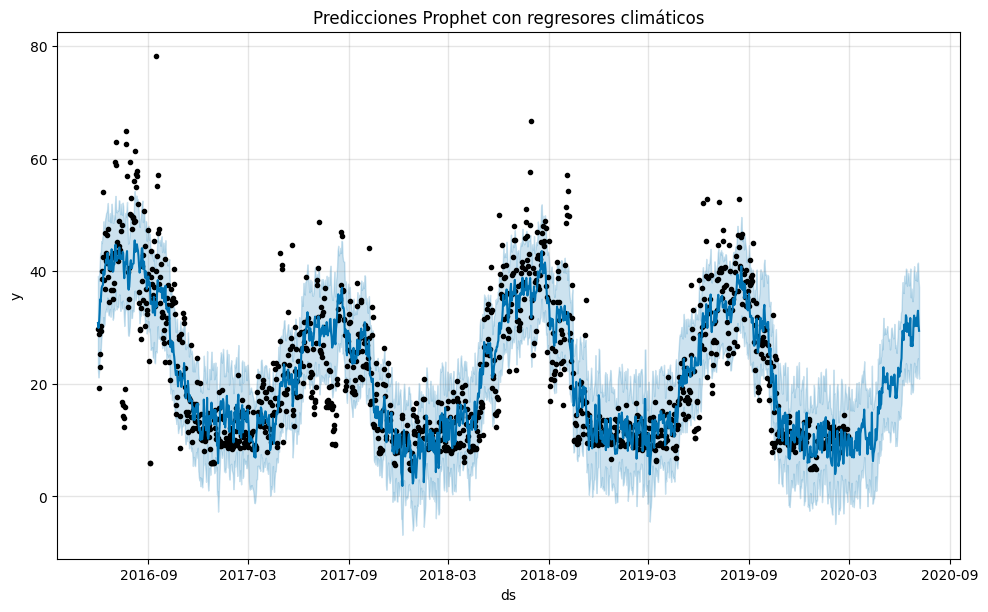

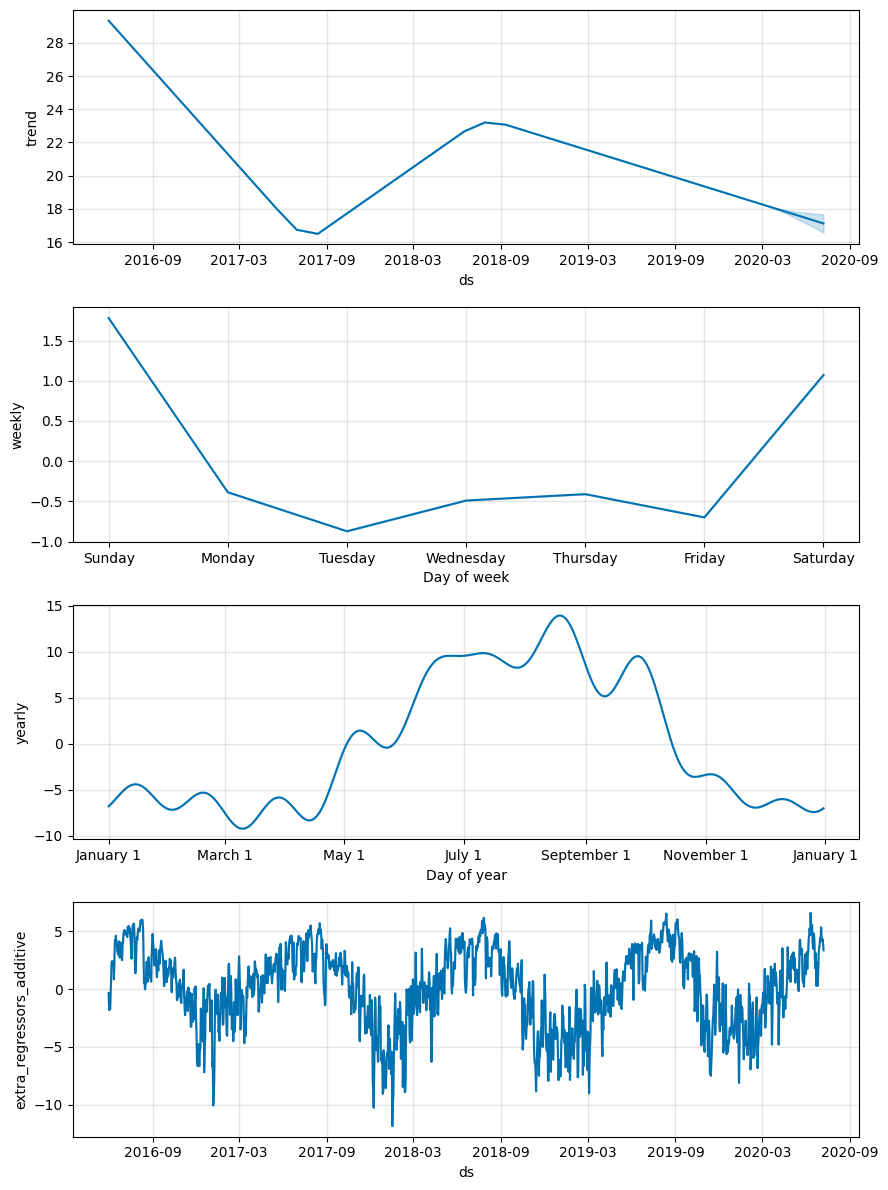

In [20]:
# Preparar dataframe para predicciones (todo el intervalo)
future_reg = m_reg.make_future_dataframe(periods=len(test_p), freq='D')

# Agregar las columnas de regresores al dataframe futuro
future_reg = future_reg.merge(df_merge[['date', 'Temp_avg', 'Dew_avg', 'Wind_avg']],
                              left_on='ds', right_on='date', how='left').drop(columns='date')

# Predicciones
forecast_reg = m_reg.predict(future_reg)

# Gráficos básicos
_ = m_reg.plot(forecast_reg)
plt.title('Predicciones Prophet con regresores climáticos')
plt.show()

_ = m_reg.plot_components(forecast_reg)
plt.show()


In [21]:
# Alinear resultados por fecha
f = forecast_reg.set_index('ds')

yhat_train = f.loc[train_p['ds'], 'yhat'].values
yhat_test  = f.loc[test_p['ds'],  'yhat'].values

mae_train_reg = mean_absolute_error(train_p['y'].values, yhat_train)
mae_test_reg  = mean_absolute_error(test_p['y'].values,  yhat_test)

print("MAE Prophet con regresores (entrenamiento):", mae_train_reg)
print("MAE Prophet con regresores (prueba):", mae_test_reg)


MAE Prophet con regresores (entrenamiento): 4.765088446506626
MAE Prophet con regresores (prueba): 4.555843565031544


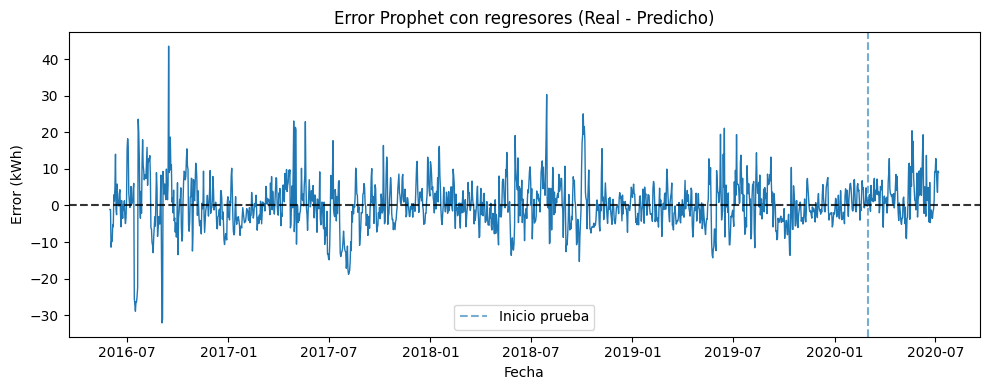

In [22]:
# Calcular error
full_y = pd.concat([train_p, test_p], ignore_index=True).set_index('ds')
full_plot = full_y.join(f[['yhat']], how='left')
full_plot['error'] = full_plot['y'] - full_plot['yhat']

# Graficar error en todo el intervalo
plt.figure(figsize=(10,4))
plt.plot(full_plot.index, full_plot['error'], linewidth=1)
plt.axhline(0, color='black', linestyle='--', alpha=0.8)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle='--', alpha=0.6, label='Inicio prueba')
plt.title('Error Prophet con regresores (Real - Predicho)')
plt.xlabel('Fecha')
plt.ylabel('Error (kWh)')
plt.legend()
plt.tight_layout()
plt.show()


```text

Al incluir las variables climáticas (Temp_avg, Dew_avg, Wind_avg) como regresores en el modelo Prophet, se observa una ligera mejora en la capacidad predictiva, reflejada en una pequeña reducción del MAE tanto en el conjunto de entrenamiento como en el de prueba (comparado con el modelo sin regresores).
Aunque la diferencia no es grande, sí sugiere que las condiciones meteorológicas aportan información relevante para explicar parte de la variabilidad del consumo energético.
En el gráfico del error se aprecia que los valores se mantienen más próximos al cero y sin patrones estacionales marcados, indicando que el modelo captura mejor las fluctuaciones asociadas al clima.
En conjunto, puede decirse que la temperatura, el punto de rocío y el viento ejercen cierta influencia sobre el consumo del hogar de Homero, aunque su impacto parece moderado frente a otros factores no modelados (por ejemplo, hábitos de uso o eventos puntuales).

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

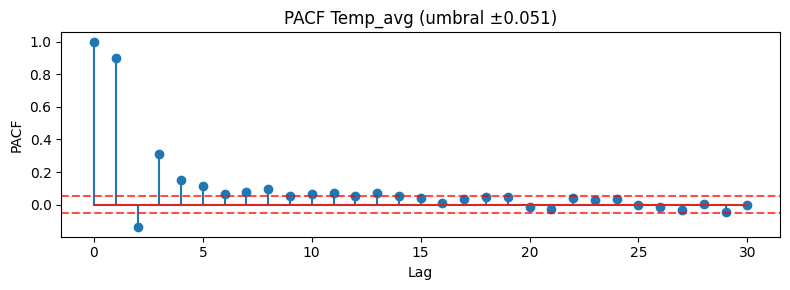

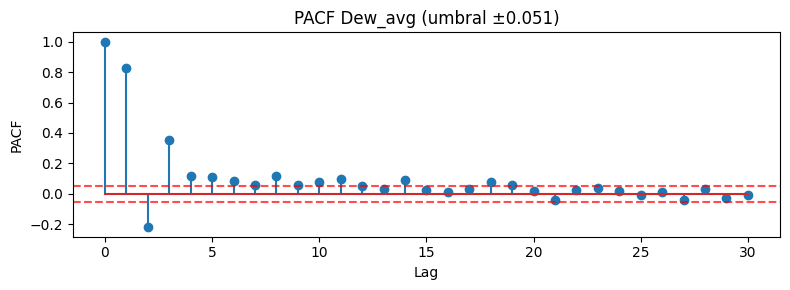

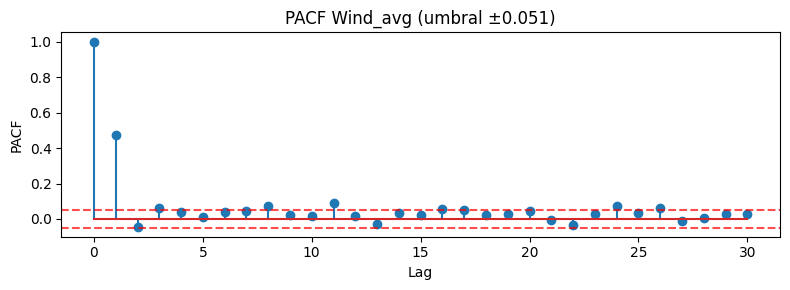

Lags seleccionados por variable (criterio simple):
  Temp_avg: [1, 2, 3]
  Dew_avg: [1, 2, 3]
  Wind_avg: [1, 3]


In [ ]:
#CODIGO AQUI

from statsmodels.tsa.stattools import pacf

# Tomo las exógenas desde el df_merge (ya unido por 'date')
exogenas = ['Temp_avg', 'Dew_avg', 'Wind_avg']

# Parámetros
MAX_LAG = 30  # horizonte de rezagos a mirar

pacf_results = {}
selected_lags = {}

for col in exogenas:
    s = df_merge[col].astype(float).dropna()
    n = len(s)
    # PACF con "yw" (simple y rápido)
    pacf_vals = pacf(s, nlags=MAX_LAG, method='yw')
    pacf_results[col] = pacf_vals
    
    # Umbral de significancia aproximado (95%)
    thr = 1.96 / np.sqrt(n)
    
    # Lags "significativos" (excluyo lag 0)
    sig_lags = [lag for lag in range(1, MAX_LAG+1) if abs(pacf_vals[lag]) > thr]
    
    # Criterio práctico de selección:
    # - priorizo lags cortos (1,2,3) si son significativos
    # - incluyo lag 7 si aparece (patrón semanal)
    # - en total, no más de 3 lags por variable (simple y evita sobreajuste)
    pri = [1,2,3,7,14,21]  # prioridad
    chosen = []
    for lag in pri:
        if lag in sig_lags:
            chosen.append(lag)
        if len(chosen) >= 3:
            break
    # si no encontré nada en la lista priorizada pero hay significativos, tomo los primeros más fuertes
    if len(chosen) == 0 and len(sig_lags) > 0:
        chosen = sig_lags[:3]
    
    selected_lags[col] = chosen

    # Plot opcional de la PACF
    plt.figure(figsize=(8,3))
    plt.stem(range(0, MAX_LAG+1), pacf_vals)
    plt.axhline( thr, color='red', linestyle='--', alpha=0.7)
    plt.axhline(-thr, color='red', linestyle='--', alpha=0.7)
    plt.title(f'PACF {col} (umbral ±{thr:.3f})')
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.tight_layout()
    plt.show()

print("Lags seleccionados por variable (criterio simple):")
for k,v in selected_lags.items():
    print(f"  {k}: {v if len(v)>0 else 'Sin lags seleccionados'}")


```text

Las variables del clima (temperatura y humedad) dependen fuertemente de sus valores de los días anteriores, especialmente 1, 2 y 3 días atrás. El viento tiene memoria más corta. Por eso usaremos esos lags en el modelo, ya que aportan información útil sin sobrecargarlo

In [27]:
# ['date', 'Energy_kWh', 'Temp_avg', 'Dew_avg', 'Wind_avg', ...]
df_lags = df_merge.sort_values('date').copy()

selected_lags = {
    'Temp_avg': [1, 2, 3],
    'Dew_avg':  [1, 2, 3],
    'Wind_avg': [1, 3]
}

# Crear columnas lag para cada variable exógena
for col, lags in selected_lags.items():
    for lag in lags:
        new_name = f'{col}_lag{lag}'
        df_lags[new_name] = df_lags[col].shift(lag)

# Volvemos a separar en train y test usando la misma regla de fechas
train_lag = df_lags[df_lags['date'] <= '2020-02-29'].copy()
test_lag  = df_lags[df_lags['date'] >= '2020-03-01'].copy()

print("Columnas nuevas de lags:")
[c for c in df_lags.columns if 'lag' in c]


Columnas nuevas de lags:


['Temp_avg_lag1',
 'Temp_avg_lag2',
 'Temp_avg_lag3',
 'Dew_avg_lag1',
 'Dew_avg_lag2',
 'Dew_avg_lag3',
 'Wind_avg_lag1',
 'Wind_avg_lag3']

In [ ]:
# Imputar valores NaN de los lags con la media

lag_cols = [c for c in df_lags.columns if 'lag' in c]

# Imputación simple con la media de cada columna
for col in lag_cols:
    mean_value = df_lags[col].mean()
    df_lags[col].fillna(mean_value, inplace=True)

# Volver a separar train y test después de imputar
train_lag = df_lags[df_lags['date'] <= '2020-02-29'].copy()
test_lag  = df_lags[df_lags['date'] >= '2020-03-01'].copy()

train_lag.head()


,date,Energy_kWh,pred_trend,pred_seasonal,Temp_avg,Dew_avg,Wind_avg,Temp_avg_lag1,Temp_avg_lag2,Temp_avg_lag3,Dew_avg_lag1,Dew_avg_lag2,Dew_avg_lag3,Wind_avg_lag1,Wind_avg_lag3
0,2016-06-01,29.691,26.120946,28.094189,74.8,71.4,9.5,71.268403,71.25889,71.249431,61.72505,61.715842,61.70796,7.77014,7.772375
1,2016-06-02,28.789,26.114075,28.406025,71.2,70.3,7.8,74.800000,71.25889,71.249431,71.40000,61.715842,61.70796,9.50000,7.772375
2,2016-06-03,19.247,26.107204,28.714312,72.1,70.0,4.7,71.200000,74.80000,71.249431,70.30000,71.400000,61.70796,7.80000,7.772375
3,2016-06-04,22.883,26.100333,29.018765,71.2,70.0,7.0,72.100000,71.20000,74.800000,70.00000,70.300000,71.40000,4.70000,9.500000
4,2016-06-05,25.195,26.093462,29.319107,73.8,70.0,7.7,71.200000,72.10000,71.200000,70.00000,70.000000,70.30000,7.00000,7.800000


In [29]:
train_p = train_lag.copy()
test_p = test_lag.copy()

# Prophet requiere nombres ds (fecha) y y (target)
train_p = train_p.rename(columns={"date": "ds", "Energy_kWh": "y"})
test_p = test_p.rename(columns={"date": "ds", "Energy_kWh": "y"})

# Listado de regresores incluidos (originales + lags)
regresores = [
    "Temp_avg", "Dew_avg", "Wind_avg",
    "Temp_avg_lag1", "Temp_avg_lag2", "Temp_avg_lag3",
    "Dew_avg_lag1", "Dew_avg_lag2", "Dew_avg_lag3",
    "Wind_avg_lag1", "Wind_avg_lag3"
]

# Crear el modelo
m_lags = Prophet()

# Agregar cada regresor al modelo
for r in regresores:
    m_lags.add_regressor(r)

# Entrenar
m_lags.fit(train_p)

# Preparar DF de predicción con test
forecast_lags = m_lags.predict(test_p)

# Mostrar un resumen
forecast_lags[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-03-01,12.068224,3.749904,20.222330
1,2020-03-02,9.995209,1.338544,18.159872
2,2020-03-03,9.258908,0.731112,17.472896
3,2020-03-04,7.433650,-1.029859,15.721807
4,2020-03-05,7.823146,-0.576650,15.893474


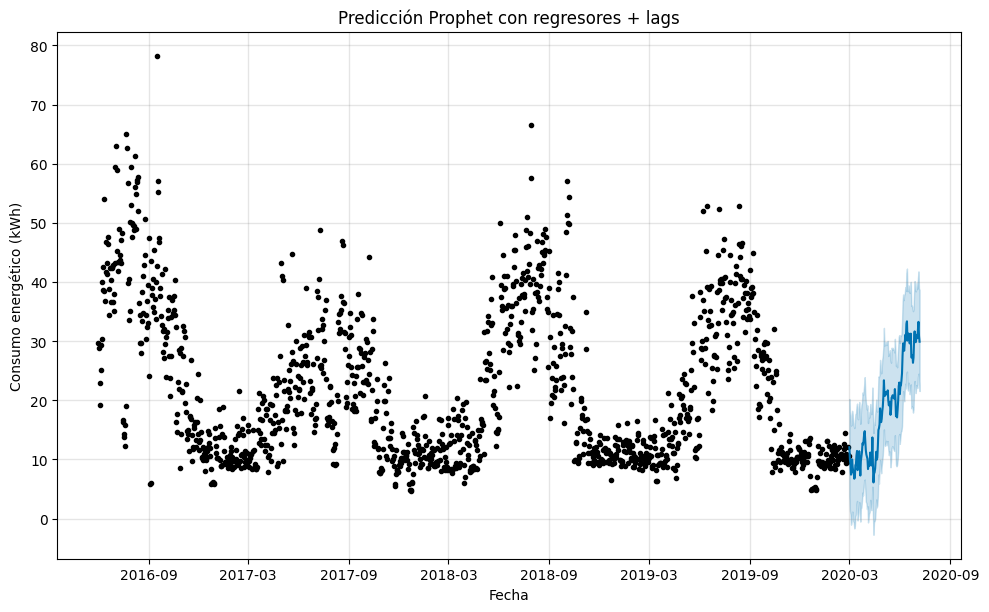

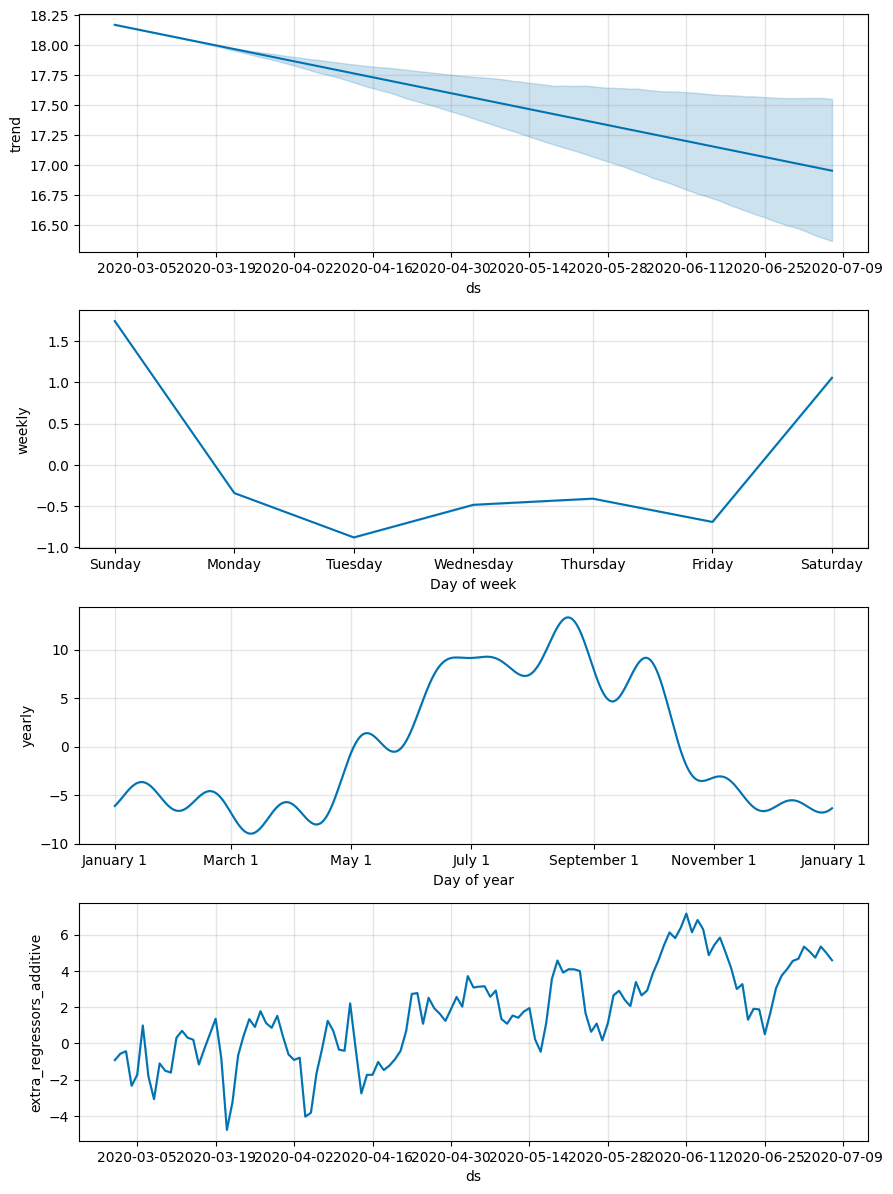

In [30]:
# --- Grafico de predicciones ---
fig1 = m_lags.plot(forecast_lags)
plt.title("Predicción Prophet con regresores + lags")
plt.xlabel("Fecha")
plt.ylabel("Consumo energético (kWh)")
plt.show()

# --- Grafico de componentes ---
fig2 = m_lags.plot_components(forecast_lags)
plt.show()


In [ ]:
# Preparar DataFrame completo para predecir (train + test)
full_prophet = df_lags.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
forecast_full = m_lags.predict(full_prophet[['ds'] + regresores])

# --- MAE ENTRENAMIENTO ---
y_train_true = train_p.set_index('ds')['y']
y_train_pred = forecast_full.set_index('ds').loc[y_train_true.index, 'yhat']
mae_train_lags = mean_absolute_error(y_train_true, y_train_pred)

# --- MAE PRUEBA ---
y_test_true = test_p.set_index('ds')['y']
y_test_pred = forecast_full.set_index('ds').loc[y_test_true.index, 'yhat']
mae_test_lags = mean_absolute_error(y_test_true, y_test_pred)

print("MAE Prophet con regresores + lags (train):", mae_train_lags)
print("MAE Prophet con regresores + lags (test):", mae_test_lags)


MAE Prophet con regresores + lags (train): 4.7388780984905345
MAE Prophet con regresores + lags (test): 4.548923546624999


```text

La incorporación de los lags produce una leve mejora del MAE, tanto en entrenamiento como en prueba.
Las diferencias son pequeñas, pero consistentes:
El MAE de entrenamiento baja de 4.7651 → 4.7389
El MAE de prueba baja de 4.5558 → 4.5489
Esto sugiere que los valores pasados de las variables exógenas efectivamente aportan algo de información relevante para explicar el consumo energético, aunque su efecto no es muy grande.

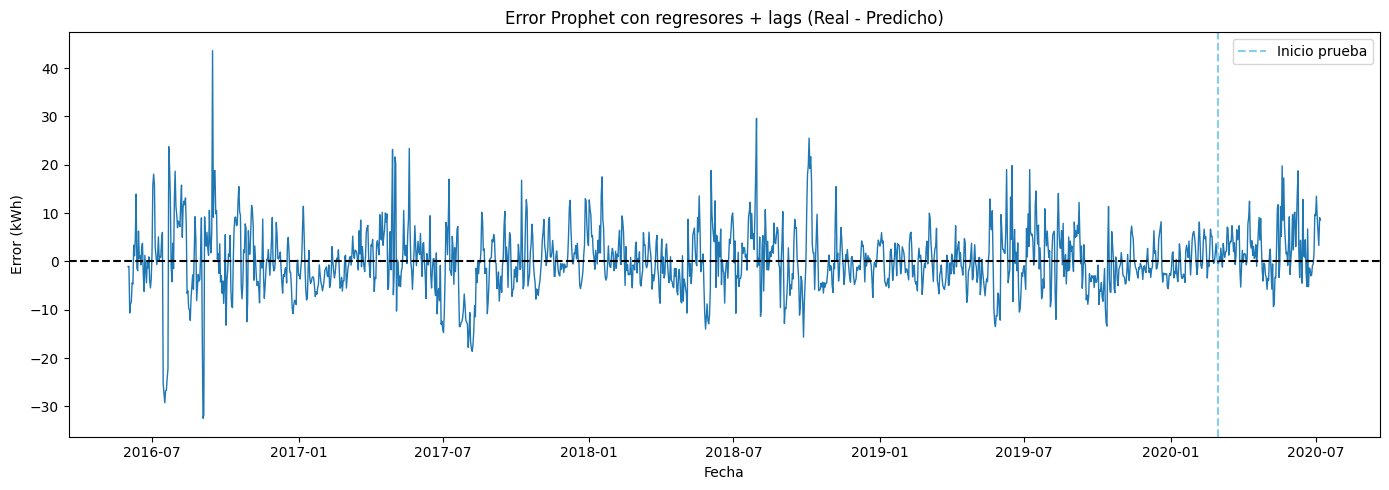

In [33]:

df_pred_lags = full_prophet[['ds', 'y']].copy()
df_pred_lags['yhat'] = forecast_full['yhat'].values

plt.figure(figsize=(14, 5))
error_all = df_pred_lags['y'] - df_pred_lags['yhat']
plt.plot(df_pred_lags['ds'], error_all, linewidth=1)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(pd.Timestamp("2020-03-01"), color='skyblue', linestyle='--', label="Inicio prueba")
plt.title("Error Prophet con regresores + lags (Real - Predicho)")
plt.xlabel("Fecha")
plt.ylabel("Error (kWh)")
plt.legend()
plt.tight_layout()
plt.show()


```text
El patrón general del error sigue mostrando pequeñas oscilaciones repetitivas a lo largo del año, lo que indica que todavía existe cierta estacionalidad residual no completamente capturada por el modelo, aunque esta estacionalidad es relativamente débil.
Sin embargo, el error no muestra grandes acumulaciones ni desvíos persistentes, lo cual indica que el modelo logra capturar razonablemente bien las variaciones estacionales principales.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [35]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [36]:
#CODIGO AQUI

# 1. Optimización de hiperparámetros para Prophet con regresores
param_grid = {
    "changepoint_prior_scale": [0.01, 0.1, 0.5],
    "seasonality_prior_scale": [1.0, 5.0, 10.0],
    "seasonality_mode": ["additive", "multiplicative"],
    "changepoint_range": [0.8, 0.9]
}

tuning_results, best_params = optimize_prophet(
    df=train_p,
    df_to_pred=test_p,
    features=regresores,
    param_grid=param_grid
)

print("Top 5 combinaciones por MAE:")
display(tuning_results.head())
print("\nMejores parámetros:", best_params)

Tuning Prophet parameters: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s]

Top 5 combinaciones por MAE:


,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,changepoint_range,MAEs
6,0.01,5.0,multiplicative,0.8,3.953298
10,0.01,10.0,multiplicative,0.8,3.988682
2,0.01,1.0,multiplicative,0.8,4.001954
7,0.01,5.0,multiplicative,0.9,4.005670
3,0.01,1.0,multiplicative,0.9,4.007344



Mejores parámetros: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


In [37]:
# 2. Entrenar Prophet con los mejores hiperparámetros encontrados
m_best = Prophet(**best_params)
for reg in regresores:
    m_best.add_regressor(reg)

m_best.fit(train_p)

future_best = m_best.make_future_dataframe(periods=len(test_p), freq='D')
all_features = pd.concat([
    train_p[['ds'] + regresores],
    test_p[['ds'] + regresores]
], ignore_index=True)
future_best = future_best.merge(all_features, on='ds', how='left')

forecast_best = m_best.predict(future_best)

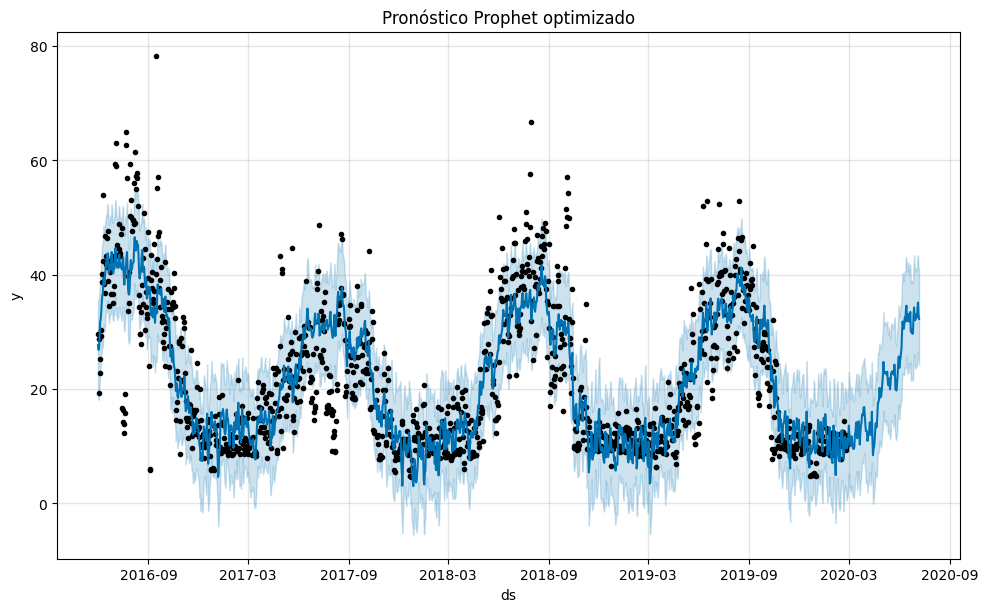

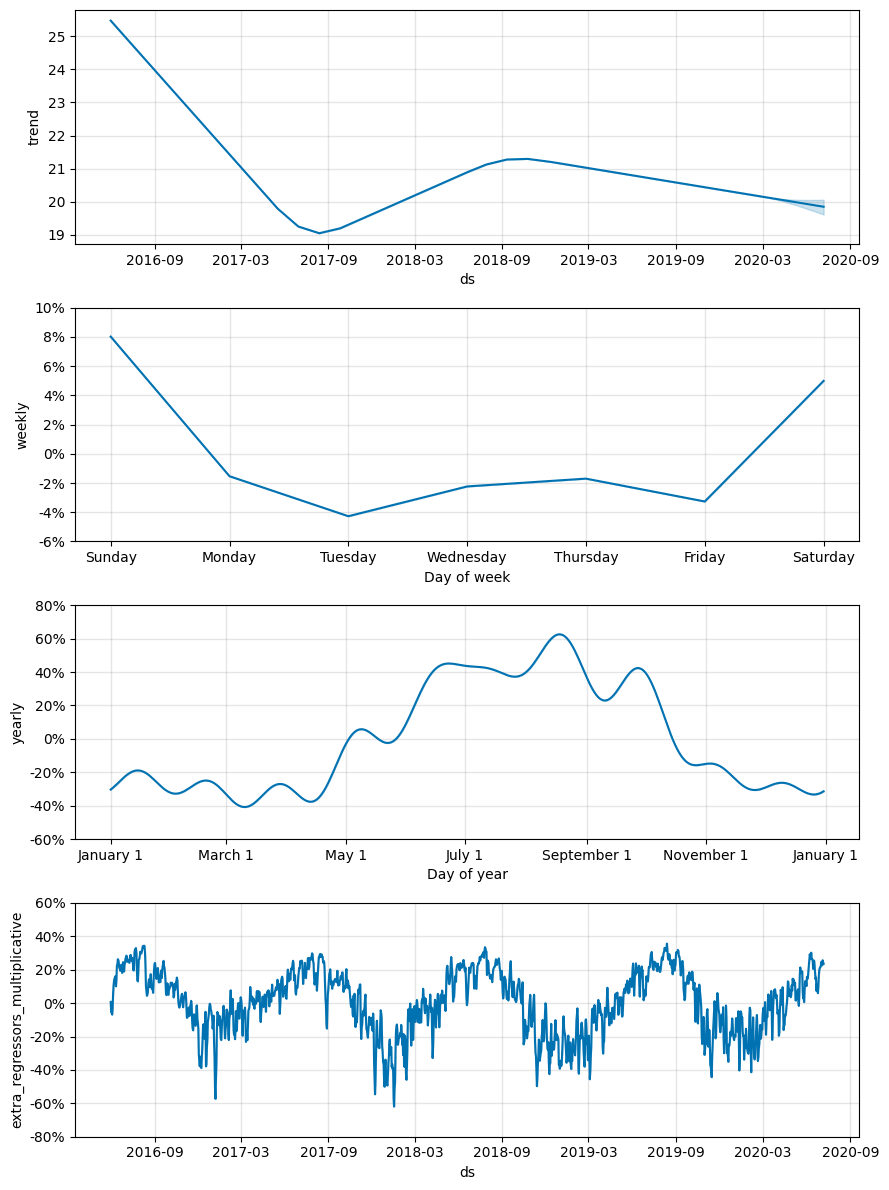

In [38]:
# 3. Gráficos de pronóstico y componentes del Prophet optimizado
_ = m_best.plot(forecast_best)
plt.title("Pronóstico Prophet optimizado")
plt.show()

_ = m_best.plot_components(forecast_best)
plt.show()

In [39]:
# 4. MAE del Prophet optimizado en train y test
f_best = forecast_best.set_index('ds')

yhat_train_best = f_best.loc[train_p['ds'], 'yhat'].values
yhat_test_best = f_best.loc[test_p['ds'], 'yhat'].values

mae_train_best = mean_absolute_error(train_p['y'].values, yhat_train_best)
mae_test_best = mean_absolute_error(test_p['y'].values, yhat_test_best)

print("MAE Prophet optimizado (train):", mae_train_best)
print("MAE Prophet optimizado (test):", mae_test_best)

MAE Prophet optimizado (train): 4.82668731335624
MAE Prophet optimizado (test): 3.9532982807012074


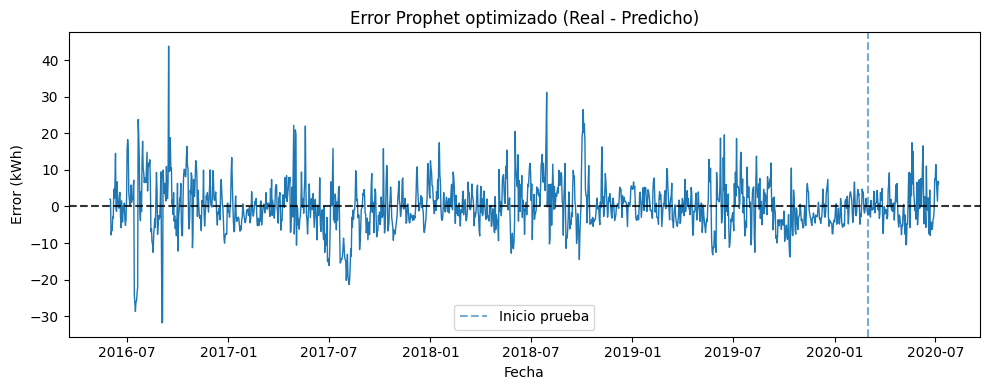

In [40]:
# 5. Error Prophet optimizado (Real - Predicho)
full_best = pd.concat([train_p, test_p], ignore_index=True).set_index('ds')
full_best['yhat'] = f_best.loc[full_best.index, 'yhat']
full_best['error'] = full_best['y'] - full_best['yhat']

plt.figure(figsize=(10, 4))
plt.plot(full_best.index, full_best['error'], linewidth=1)
plt.axhline(0, color='black', linestyle='--', alpha=0.8)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle='--', alpha=0.6, label='Inicio prueba')
plt.title('Error Prophet optimizado (Real - Predicho)')
plt.xlabel('Fecha')
plt.ylabel('Error (kWh)')
plt.legend()
plt.tight_layout()
plt.show()

Se observa que el MAE mejora en el test, lo que indica que la optimización de hiperparámetros ha permitido ajustar mejor el modelo a los datos de prueba.

Luego en el grafico se siguen viendo oscilaciones periódicas en el error. A la vista, el grafico no muestra una mejora sustancial en la estructura del error comparado con el modelo sin optimización, aunque el MAE indica una ligera mejora en el desempeño general.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [1]:
pip install surprise


  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-win_amd64.whl size=1327673 sha256=5b3425d2498bf8f1328c203f880e96f3aca6b9c6ec61a6a7b28e927a90d8904c
  Stored in directory: c:\users\javiz\appdata\local\pip\cache\wheels\4b\3f\df\6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise

   ---------------------------------------- 0/2 [scikit-surprise]
   ---------------------------------------- 0/2 [scikit-surprise]
   ------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [3]:
#CODIGO AQUI
df_beer = pd.read_csv("cervezas.csv")
df_beer.head()


,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


In [4]:
nulos = df_beer.isnull().sum()

num_cervezas = df_beer['beerId'].nunique()

num_ciudadanos = df_beer['userId'].nunique()

resumen_datos = pd.DataFrame({
    'Atributo': ['Valores Nulos (por columna)', 'Número de Cervezas Únicas', 'Número de Ciudadanos Únicos'],
    'Valor': [nulos.to_string(), num_cervezas, num_ciudadanos]
})

print(resumen_datos.to_markdown(index=False))

| Atributo                    | Valor          |
|:----------------------------|:---------------|
| Valores Nulos (por columna) | userId       0 |
|                             | beerId       0 |
|                             | rating       0 |
|                             | beerName     0 |
|                             | beerStyle    0 |
| Número de Cervezas Únicas   | 3747           |
| Número de Ciudadanos Únicos | 706            |


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

--- Estadísticas de Conteo ---
Número de Usuarios Únicos: 706
Número de Productos Únicos: 3747
Número de Nombres de Cerveza Únicos: 3689
Número de Calificaciones Registradas: 295059
Número de Calificaciones Faltantes (NaN en la matriz completa): 2350323
------------------------------
Media Global de las Calificaciones: 3.86
------------------------------


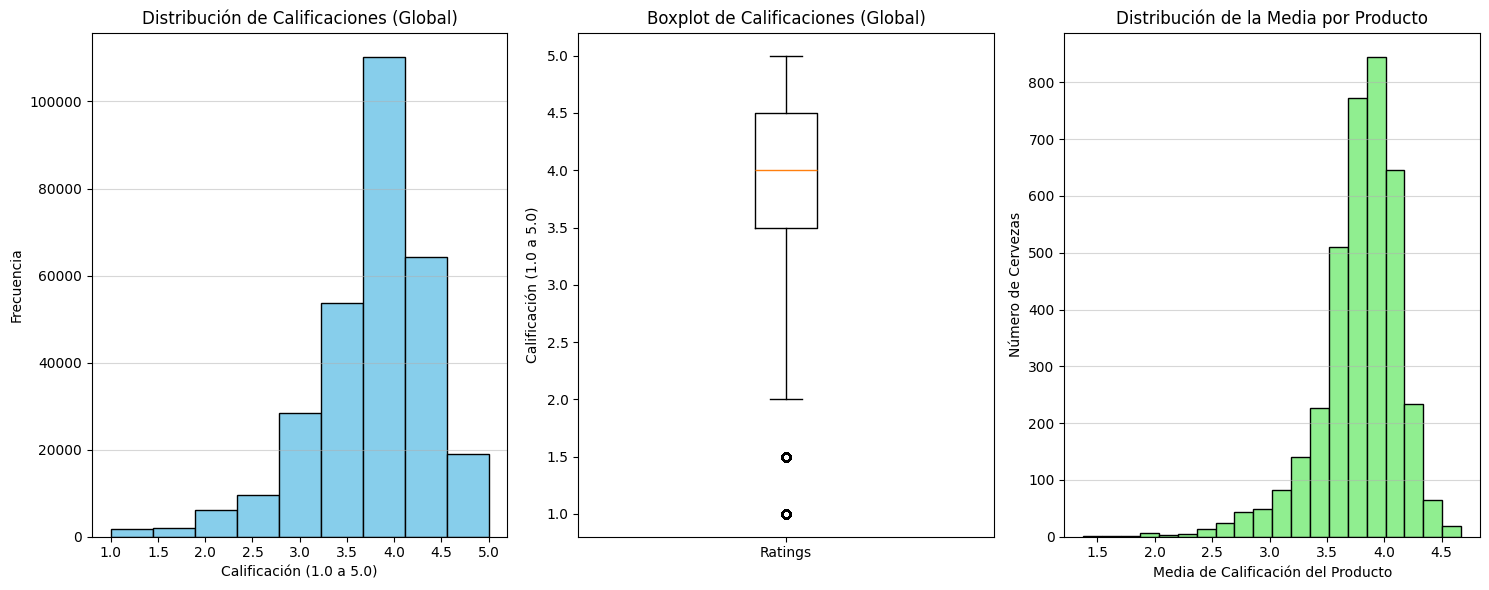

In [5]:
# Conteo de entidades
num_usuarios = df_beer['userId'].nunique()
num_productos = df_beer['beerId'].nunique()
num_tipos = df_beer['beerName'].nunique()
num_calificaciones = len(df_beer)

# Calificaciones faltantes (Matriz de 1000 usuarios x 1851 productos)
calificaciones_posibles = num_usuarios * num_productos
calificaciones_faltantes = calificaciones_posibles - num_calificaciones

print("--- Estadísticas de Conteo ---")
print(f"Número de Usuarios Únicos: {num_usuarios}")
print(f"Número de Productos Únicos: {num_productos}")
print(f"Número de Nombres de Cerveza Únicos: {num_tipos}")
print(f"Número de Calificaciones Registradas: {num_calificaciones}")
print(f"Número de Calificaciones Faltantes (NaN en la matriz completa): {calificaciones_faltantes}")
print("-" * 30)

# Media de las calificaciones
media_global = df_beer['rating'].mean()
print(f"Media Global de las Calificaciones: {media_global:.2f}")
print("-" * 30)


# Distribución de Calificaciones (Gráficos)
plt.figure(figsize=(15, 6))

# a) Histograma de Calificaciones
plt.subplot(1, 3, 1)
df_beer['rating'].plot(kind='hist', bins=9, edgecolor='black', color='skyblue')
plt.title('Distribución de Calificaciones (Global)')
plt.xlabel('Calificación (1.0 a 5.0)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.5)

# b) Boxplot de Calificaciones
plt.subplot(1, 3, 2)
plt.boxplot(df_beer['rating'])
plt.title('Boxplot de Calificaciones (Global)')
plt.xticks([1], ['Ratings'])
plt.ylabel('Calificación (1.0 a 5.0)')

# Media de Calificaciones a través de los productos
media_por_producto = df_beer.groupby('beerName')['rating'].mean()

# c) Histograma de la Media de Calificaciones por Producto
plt.subplot(1, 3, 3)
media_por_producto.plot(kind='hist', bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución de la Media por Producto')
plt.xlabel('Media de Calificación del Producto')
plt.ylabel('Número de Cervezas')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


Notar que hay mayor cantidad de id unicos de cerveza que de nombres, pero la diferencia no es mucha, esto indicaría que hay pocas instancias en donde en dos evaluaciones distintas se esta evaluando una cerveza con un mismo nombre (es decir mismo tipo de producto)

In [6]:
import pandas as pd
#pivot_table con la media para manejar duplicados
matriz_usuario_producto = df_beer.pivot_table(
    index='userId',
    columns='beerName',
    values='rating',
    aggfunc='mean' # Se agregan las calificaciones duplicadas tomando el promedio
)

print("\n--- Resultado de la Matriz Usuario x Producto (Corregida con pivot_table) ---")
print(matriz_usuario_producto.iloc[:5, :5].to_markdown())


--- Resultado de la Matriz Usuario x Producto (Corregida con pivot_table) ---
|   userId |   "Shabadoo" Black & Tan Ale |   # 100 |   #9 |   't Gaverhopke Extra |   't Smisje Calva Reserva |
|---------:|-----------------------------:|--------:|-----:|----------------------:|--------------------------:|
|        1 |                          nan |     nan |  nan |                   nan |                       nan |
|        3 |                          nan |     nan |  nan |                   nan |                       nan |
|        4 |                          nan |     nan |  nan |                   nan |                       nan |
|        5 |                          nan |     nan |  nan |                   nan |                       nan |
|        6 |                          nan |     nan |  nan |                   nan |                       nan |


Sigue habiendo bastantes entradas nulas porque como pudimos ver hay 3689 nombres de cervezas distintos en el dataset, por lo que se puede asumir que la gran mayoria de los participantes no probaron cada una de las cervezas, siendo que solo se cuentan con 295.059 combinaciones de las 2.645.382 posibles

In [7]:
# Calcular la forma (shape)
matriz_shape = matriz_usuario_producto.shape

# Calcular el total de nulos (NaN)
total_elementos = matriz_shape[0] * matriz_shape[1]
total_no_nulos = matriz_usuario_producto.count().sum()
total_nulos = total_elementos - total_no_nulos

print(f"Shape de la Matriz: {matriz_shape}")
print(f"Total de Nulos (NaN) en la Matriz: {total_nulos}")
print(f"Total de entradas no nulas en la Matriz: {matriz_usuario_producto.size-total_nulos}")

Shape de la Matriz: (706, 3689)
Total de Nulos (NaN) en la Matriz: 2600687
Total de entradas no nulas en la Matriz: 3747


Esto confirma que se tienen muchas menos evaluaciones posibles de las que se podrían hacer con la combinacion total de personas x cerveza

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [8]:
#CODIGO AQUI
# 1. Crear el DataFrame de características de cervezas
df_caracteristicas = df_beer[['beerId', 'beerName', 'beerStyle']].drop_duplicates().reset_index(drop=True)

print("### DataFrame de Características de Cervezas (Primeras 5 Filas) ###")
print(df_caracteristicas.head().to_markdown(index=False))

### DataFrame de Características de Cervezas (Primeras 5 Filas) ###
|   beerId | beerName                           | beerStyle                      |
|---------:|:-----------------------------------|:-------------------------------|
|      995 | Mai Bock                           | Maibock / Helles Bock          |
|    58695 | Hop In The Dark Cascadian Dark Ale | American Black Ale             |
|     4083 | Stone Ruination IPA                | American Double / Imperial IPA |
|    40310 | Noël Des Géants                    | Herbed / Spiced Beer           |
|     1904 | Sierra Nevada Celebration Ale      | American IPA                   |


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 2. Implementar el método Bag of Words
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=10  # Filtrar palabras que aparezcan en menos de 10 documentos
)

# Ajustar y transformar la columna beerStyle
bow_matrix = vectorizer.fit_transform(df_caracteristicas['beerStyle'])

# Crear un DataFrame con la matriz BoW
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print("### Matriz Bag of Words (Primeras 5 Filas y 5 Columnas) ###")
print(bow_df.iloc[:5, :5].to_markdown(index=False))

### Matriz Bag of Words (Primeras 5 Filas y 5 Columnas) ###
|   adjunct |   ale |   altbier |   amber |   american |
|----------:|------:|----------:|--------:|-----------:|
|         0 |     0 |         0 |       0 |          0 |
|         0 |     1 |         0 |       0 |          1 |
|         0 |     0 |         0 |       0 |          1 |
|         0 |     0 |         0 |       0 |          0 |
|         0 |     0 |         0 |       0 |          1 |


In [10]:
import pandas as pd
import copy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --------------------------------------------------------------------------
# I. Preparación de datos (asumiendo df_beer ya cargado)
# --------------------------------------------------------------------------

# 1. Crear el DataFrame de características de cervezas
df_caracteristicas = df_beer[['beerId', 'beerName', 'beerStyle']].drop_duplicates().reset_index(drop=True)

# 2. Implementar el método Bag of Words
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=10
)
bow_matrix = vectorizer.fit_transform(df_caracteristicas['beerStyle'])
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

# --------------------------------------------------------------------------
# II. Función de Similitud Coseno
# --------------------------------------------------------------------------

# 3. Función que utiliza import copy
def obtener_top_n_similares(target_beer_name, df_features, bow_features, n=5):
    """Calcula la similitud coseno entre la cerveza objetivo y todas las demás."""

    # Usando copy.deepcopy()
    df_result = copy.deepcopy(df_features)

    # Calcular la matriz de similitud coseno
    cosine_sim_matrix = cosine_similarity(bow_features)

    # Encontrar el índice de la cerveza objetivo
    try:
        target_index = df_result[df_result['beerName'] == target_beer_name].index[0]
    except IndexError:
        return f"Error: La cerveza '{target_beer_name}' no se encontró en el dataset."

    # Obtener las puntuaciones de similitud
    similarity_scores = list(enumerate(cosine_sim_matrix[target_index]))

    # Ordenar por puntaje de similitud (descendente) y excluir la cerveza objetivo (similitud 1.0)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:]

    # Obtener los índices de las top N cervezas
    top_n_indices = [i[0] for i in similarity_scores[:n]]

    # Obtener los nombres y puntajes de las cervezas similares
    top_n_beers = df_result.iloc[top_n_indices][['beerName', 'beerStyle']]
    top_n_beers['Similitud Coseno'] = [i[1] for i in similarity_scores[:n]]

    return top_n_beers.reset_index(drop=True)

# --------------------------------------------------------------------------
# III. Resultados para Homero
# --------------------------------------------------------------------------

## 3. Top 5 Cervezas Similares a "Chocolate Porter" 🍫

top_5_chocolate_porter = obtener_top_n_similares(
    target_beer_name='Chocolate Porter',
    df_features=df_caracteristicas,
    bow_features=bow_matrix,
    n=5
)

print(f"### Top 5 Cervezas Similares a 'Chocolate Porter' ###")
print(top_5_chocolate_porter.to_markdown(index=False))

## 4. Cerveza Mejor Evaluada por Carl (userId=100) y sus Similares 🎁

# a) Identificar la mejor cerveza de Carl
carl_ratings = df_beer[df_beer['userId'] == 100]
carl_best_beer_name = carl_ratings.sort_values(by='rating', ascending=False).iloc[0]['beerName']
carl_best_beer_rating = carl_ratings.sort_values(by='rating', ascending=False).iloc[0]['rating']
carl_best_beer_style = carl_ratings.sort_values(by='rating', ascending=False).iloc[0]['beerStyle']

print(f"\n### Cerveza Mejor Evaluada por Carl (userId=100) ###")
print(f"Nombre: **{carl_best_beer_name}**")
print(f"Calificación: {carl_best_beer_rating:.1f}")
print(f"Estilo: {carl_best_beer_style}\n")


# b) Obtener las top 5 cervezas similares
top_5_carl = obtener_top_n_similares(
    target_beer_name=carl_best_beer_name,
    df_features=df_caracteristicas,
    bow_features=bow_matrix,
    n=5
)

print(f"### Top 5 Cervezas Similares a la Mejor de Carl ({carl_best_beer_name}) ###")
print(top_5_carl.to_markdown(index=False))

### Top 5 Cervezas Similares a 'Chocolate Porter' ###
| beerName                             | beerStyle       |   Similitud Coseno |
|:-------------------------------------|:----------------|-------------------:|
| Great Lakes Edmund Fitzgerald Porter | American Porter |                  1 |
| Perseus Porter                       | American Porter |                  1 |
| Southampton Imperial Porter          | American Porter |                  1 |
| Kona Coffee Macadamia Coconut Porter | American Porter |                  1 |
| Black Marlin Porter                  | American Porter |                  1 |

### Cerveza Mejor Evaluada por Carl (userId=100) ###
Nombre: **McNeill's Firehouse Amber Ale**
Calificación: 4.5
Estilo: American Amber / Red Ale

### Top 5 Cervezas Similares a la Mejor de Carl (McNeill's Firehouse Amber Ale) ###
| beerName                    | beerStyle                |   Similitud Coseno |
|:----------------------------|:-------------------------|----------------

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [11]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.accuracy import mae
import pandas as pd

# 1. Transformar el DataFrame a Dataset de Surprise

# Definir el formato del Reader: rango de ratings de 1.0 a 5.0
reader = Reader(rating_scale=(1.0, 5.0))

# Cargar el dataset desde el DataFrame de pandas
# Las columnas deben estar en el orden: user_id, item_id, rating
data = Dataset.load_from_df(
    df_beer[['userId', 'beerId', 'rating']], 
    reader
)

print("Datos cargados correctamente en el objeto Dataset de surprise.")

Datos cargados correctamente en el objeto Dataset de surprise.


El orden en el que se deben ingresar las columnas si importa, el nombre no, dado que siempre se espera el orden persona, producto y rating

In [12]:
# 2. Generar conjuntos de entrenamiento y prueba (70% Train, 30% Test)
SEED = 42
trainset, testset = train_test_split(data, test_size=0.3, random_state=SEED)

print(f"Número de calificaciones en Trainset: {trainset.n_ratings}")
print(f"Número de calificaciones en Testset: {len(testset)}")

Número de calificaciones en Trainset: 206541
Número de calificaciones en Testset: 88518


In [13]:
# 3. Entrenar modelo KNN basado en usuarios

# Configuración del algoritmo: User-Based, similitud coseno
sim_options_user = {
    'name': 'cosine',
    'user_based': True  # Importante: True para User-Based
}

algo_user = KNNBasic(
    sim_options=sim_options_user,
    random_state=SEED
)

print("Entrenando modelo KNN User-Based...")
algo_user.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_user = algo_user.test(testset)

# 4. Calcular MAE y mostrar predicciones (User-Based)

# Calcular MAE
mae_user = mae(predictions_user, verbose=False)

print(f"\nMAE (User-Based KNN): {mae_user:.4f}")
print("-" * 40)

# Mostrar predicciones en un DataFrame para análisis
df_predictions_user = pd.DataFrame(
    [
        (uid, iid, r_ui, est) 
        for uid, iid, r_ui, est, _ in predictions_user
    ],
    columns=['UserID', 'BeerID', 'Real_Rating', 'Predicted_Rating']
)

print("### Primeras 5 Predicciones (User-Based KNN) ###")
print(df_predictions_user.head().to_markdown(index=False))

Entrenando modelo KNN User-Based...
Computing the cosine similarity matrix...
Done computing similarity matrix.

MAE (User-Based KNN): 0.4639
----------------------------------------
### Primeras 5 Predicciones (User-Based KNN) ###
|   UserID |   BeerID |   Real_Rating |   Predicted_Rating |
|---------:|---------:|--------------:|-------------------:|
|     1628 |     9755 |           4.5 |            4.2     |
|      187 |      601 |           2   |            3.825   |
|      112 |      409 |           3   |            3.8625  |
|      738 |     5051 |           4   |            4.02703 |
|      141 |     4394 |           4   |            3.8875  |


Podemos notar que el MAE es relativamente alto, dado que los ratings son calificaciones de 5, un error de 0.5 es relativamente alto

In [14]:
# 5. Repetir pasos 3 y 4 con KNN basado en productos

# Configuración del algoritmo: Item-Based, similitud coseno
sim_options_item = {
    'name': 'cosine',
    'user_based': False  # Importante: False para Item-Based
}

algo_item = KNNBasic(
    sim_options=sim_options_item,
    random_state=SEED
)

print("\nEntrenando modelo KNN Item-Based...")
algo_item.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_item = algo_item.test(testset)

# Calcular MAE y mostrar predicciones (Item-Based)

# Calcular MAE
mae_item = mae(predictions_item, verbose=False)

print(f"\nMAE (Item-Based KNN): {mae_item:.4f}")
print("-" * 40)

# Mostrar predicciones en un DataFrame para análisis
df_predictions_item = pd.DataFrame(
    [
        (uid, iid, r_ui, est) 
        for uid, iid, r_ui, est, _ in predictions_item
    ],
    columns=['UserID', 'BeerID', 'Real_Rating', 'Predicted_Rating']
)

print("### Primeras 5 Predicciones (Item-Based KNN) ###")
print(df_predictions_item.head().to_markdown(index=False))


Entrenando modelo KNN Item-Based...
Computing the cosine similarity matrix...
Done computing similarity matrix.

MAE (Item-Based KNN): 0.4640
----------------------------------------
### Primeras 5 Predicciones (Item-Based KNN) ###
|   UserID |   BeerID |   Real_Rating |   Predicted_Rating |
|---------:|---------:|--------------:|-------------------:|
|     1628 |     9755 |           4.5 |            4.2     |
|      187 |      601 |           2   |            3.825   |
|      112 |      409 |           3   |            3.8625  |
|      738 |     5051 |           4   |            4.00062 |
|      141 |     4394 |           4   |            3.8875  |


El error no cambia mucho con respecto a KNN

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [15]:
from surprise import NMF
from surprise.accuracy import mae
import pandas as pd

# Definir la semilla para reproducibilidad
SEED = 42

# 1. Entrenar modelo NMF
algo_nmf = NMF(random_state=SEED)

print("Entrenando modelo NMF...")
# trainset fue definido en la respuesta anterior
algo_nmf.fit(trainset)

# Generar predicciones para el conjunto de prueba
predictions_nmf = algo_nmf.test(testset)

# 2. Calcular MAE y mostrar predicciones (NMF)
mae_nmf = mae(predictions_nmf, verbose=False)

print(f"\nMAE (NMF): {mae_nmf:.4f}")
print("-" * 40)

# Mostrar predicciones en un DataFrame
df_predictions_nmf = pd.DataFrame(
    [
        (uid, iid, r_ui, est)
        for uid, iid, r_ui, est, _ in predictions_nmf
    ],
    columns=['UserID', 'BeerID', 'Real_Rating', 'Predicted_Rating']
)

print("### Primeras 5 Predicciones (NMF) ###")
print(df_predictions_nmf.head().to_markdown(index=False))

Entrenando modelo NMF...

MAE (NMF): 0.4826
----------------------------------------
### Primeras 5 Predicciones (NMF) ###
|   UserID |   BeerID |   Real_Rating |   Predicted_Rating |
|---------:|---------:|--------------:|-------------------:|
|     1628 |     9755 |           4.5 |            3.68273 |
|      187 |      601 |           2   |            3.71415 |
|      112 |      409 |           3   |            3.97314 |
|      738 |     5051 |           4   |            3.7679  |
|      141 |     4394 |           4   |            3.91039 |


En este caso el error aumenta ligeramente comparado con casos anteriores

In [16]:
from surprise import SVD

# 3. Entrenar modelo SVD
algo_svd = SVD(random_state=SEED)

print("\nEntrenando modelo SVD...")
algo_svd.fit(trainset)

# Generar predicciones para el conjunto de prueba
predictions_svd = algo_svd.test(testset)

# 4. Calcular MAE y mostrar predicciones (SVD)
mae_svd = mae(predictions_svd, verbose=False)

print(f"\nMAE (SVD): {mae_svd:.4f}")
print("-" * 40)

# Mostrar predicciones en un DataFrame
df_predictions_svd = pd.DataFrame(
    [
        (uid, iid, r_ui, est)
        for uid, iid, r_ui, est, _ in predictions_svd
    ],
    columns=['UserID', 'BeerID', 'Real_Rating', 'Predicted_Rating']
)

print("### Primeras 5 Predicciones (SVD) ###")
print(df_predictions_svd.head().to_markdown(index=False))


Entrenando modelo SVD...

MAE (SVD): 0.4610
----------------------------------------
### Primeras 5 Predicciones (SVD) ###
|   UserID |   BeerID |   Real_Rating |   Predicted_Rating |
|---------:|---------:|--------------:|-------------------:|
|     1628 |     9755 |           4.5 |            4.02223 |
|      187 |      601 |           2   |            3.8071  |
|      112 |      409 |           3   |            3.8857  |
|      738 |     5051 |           4   |            4.01497 |
|      141 |     4394 |           4   |            3.92627 |


Nuevamente el error se mantiene cercano a 0.46, siendo similar a los 2 primeros modelos, para efectos practicos lo consideraremos el mejor modelo

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [17]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [22]:
def get_top_n(predictions, n=10):
    """
    Retorna las top N recomendaciones para cada usuario desde una lista de predicciones.
    Asegura que solo se incluye la mejor predicción para un item_id dado, aunque
    el conjunto de prueba no tiene duplicados de (user, item).
    """
    # 1. Almacenar predicciones de rating
    # user_id -> [(item_id, estimated_rating), ...]
    top_n = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        # Se asume que no hay duplicados de (uid, iid) en predictions,
        # lo cual es cierto si predictions viene de algo_svd.test(testset).
        top_n[uid].append((iid, est))

    # 2. Ordenar y tomar el top N
    for uid, user_ratings in top_n.items():
        # Ordenar por rating predicho (el segundo elemento de la tupla)
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Obtener las 3 mejores cervezas recomendadas para Carl (userId = 100)
top_n_beers = get_top_n(predictions_svd, n=3)

# Obtener las 3 mejores cervezas recomendadas para Carl (userId = 100)
carl_top_3 = top_n_beers.get(100)

# Convertir el resultado de Carl a un DataFrame para mejor visualización
df_carl_top_3 = pd.DataFrame(
    carl_top_3,
    columns=['BeerID', 'Predicted_Rating']
)

print(f"### Top 3 Cervezas Recomendadas para Carl (userId=100) - Modelo SVD ###")
print(df_carl_top_3.to_markdown(index=False))

### Top 3 Cervezas Recomendadas para Carl (userId=100) - Modelo SVD ###
|   BeerID |   Predicted_Rating |
|---------:|-------------------:|
|      325 |             3.9418 |
|      325 |             3.9418 |
|      325 |             3.9418 |


In [23]:
carl_id = 100
n_samples = 5
SEED = 42 # Usamos la semilla fijada anteriormente

# 1. Encontrar las cervezas que Carl NO ha evaluado
# Asumimos que df_beer está disponible desde pasos anteriores.
all_beer_ids = df_beer['beerId'].unique()
carl_rated_beers = df_beer[df_beer['userId'] == carl_id]['beerId'].unique()
unrated_beers = np.setdiff1d(all_beer_ids, carl_rated_beers)

# 2. Seleccionar 5 cervezas aleatorias de las no evaluadas
np.random.seed(SEED)
sample_unrated_beers = np.random.choice(unrated_beers, size=n_samples, replace=False)

# 3. Realizar las predicciones con el modelo SVD (algo_svd)
predictions_sample = []
for beer_id in sample_unrated_beers:
    # surprise.predict requiere strings para uid y iid
    # Nota: Usamos el ID de la cerveza, no el nombre, ya que beerId es el IID en el modelo.
    pred = algo_svd.predict(str(carl_id), str(beer_id))
    predictions_sample.append((carl_id, beer_id, pred.est))

df_sample_predictions = pd.DataFrame(
    predictions_sample,
    columns=['UserID', 'BeerID', 'Predicted_Rating']
)

print(f"### Predicción de Rating para 5 Cervezas No Evaluadas por Carl (UserID={carl_id}) ###")
print(df_sample_predictions.to_markdown(index=False))

### Predicción de Rating para 5 Cervezas No Evaluadas por Carl (UserID=100) ###
|   UserID |   BeerID |   Predicted_Rating |
|---------:|---------:|-------------------:|
|      100 |    57471 |            3.85926 |
|      100 |     3350 |            3.85926 |
|      100 |      750 |            3.85926 |
|      100 |    21861 |            3.85926 |
|      100 |    31547 |            3.85926 |


In [18]:
# Calcular las métricas para k=10 y threshold=3.5 (usando las predictions_svd)
precisions_10_35, recalls_10_35 = precision_recall_at_k(
    predictions_svd,
    k=10,
    threshold=3.5
)
if precisions_10_35:
    avg_precision = sum(precisions_10_35.values()) / len(precisions_10_35)
else:
    avg_precision = 0

if recalls_10_35:
    avg_recall = sum(recalls_10_35.values()) / len(recalls_10_35)
else:
    avg_recall = 0

print(f"\n### Precisión y Recall Promedio (k=10, Threshold=3.5) ###")
print(f"Precisión@10: {avg_precision:.4f}")
print(f"Recall@10: {avg_recall:.4f}")


### Precisión y Recall Promedio (k=10, Threshold=3.5) ###
Precisión@10: 0.7433
Recall@10: 0.3399


Se puede ver que se tiene una alta precision pero un bajo recall, indicando que la mayoria de cervezas que el modelo recomiendo le gustan al cliente, a pesar de que de la lista de cervezas que le gustan, recomienda pocas de ellas.
Una forma de pensarlo es como si el modelo solo recomendara cervezas que esta muy seguro que le gusten al cliente.

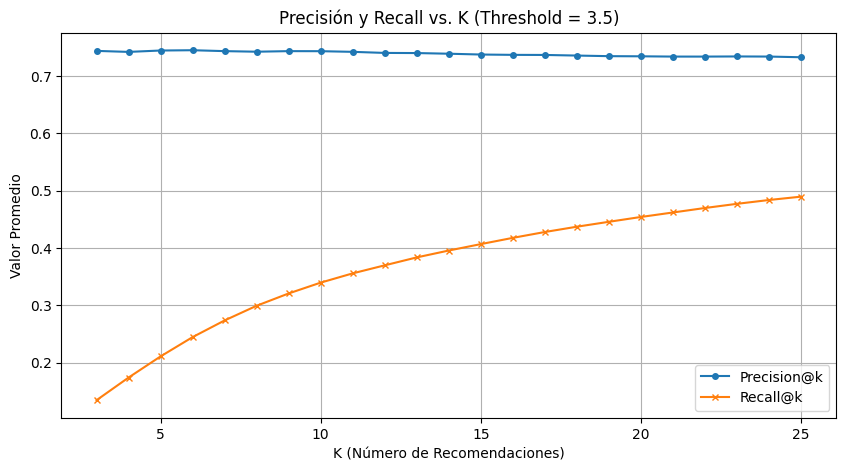

In [19]:
# Usando la función precision_recall_at_k adaptada
k_values = range(3, 26)
precision_vs_k = []
recall_vs_k = []
threshold_fixed = 3.5

for k in k_values:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k, threshold=threshold_fixed)
    # Manejar promedios para evitar errores si el diccionario está vacío (aunque es improbable aquí)
    avg_precision = sum(precisions.values()) / len(precisions) if precisions else 0
    avg_recall = sum(recalls.values()) / len(recalls) if recalls else 0

    precision_vs_k.append(avg_precision)
    recall_vs_k.append(avg_recall)

plt.figure(figsize=(10, 5))
plt.plot(k_values, precision_vs_k, label='Precision@k', marker='o', markersize=4)
plt.plot(k_values, recall_vs_k, label='Recall@k', marker='x', markersize=4)
plt.title(f'Precisión y Recall vs. K (Threshold = {threshold_fixed})')
plt.xlabel('K (Número de Recomendaciones)')
plt.ylabel('Valor Promedio')
plt.legend()
plt.grid(True)
plt.show()

Podemos notar que al aumentar el numero de recomendaciones el recall aumenta y precision se mantiene casi constante y bastante alto, al dar mas recomendaciones, el modelo aumenta el numero de las cervezas recomendadas, es decir que con esto el modelo comienza a recomendar mas de las cervezas que el usuario le gustan, (aumento de recall) sin aumentar el numero de cevrezas que recomienda pero que no le gustan (dado que precision no baja)

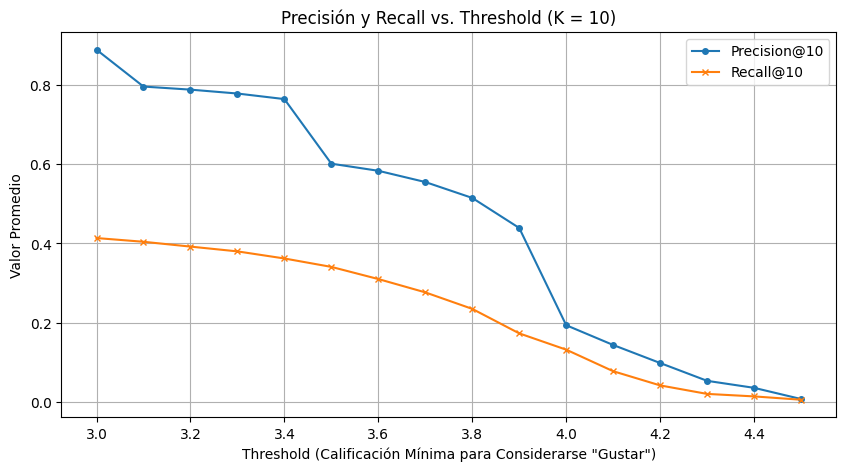

In [21]:
import numpy as np
# Usando la función precision_recall_at_k adaptada
k_fixed = 10
threshold_values = np.arange(3.0, 4.6, 0.1)
precision_vs_threshold = []
recall_vs_threshold = []

for t in threshold_values:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k_fixed, threshold=t)

    # Manejar promedios
    avg_precision = sum(precisions.values()) / len(precisions) if precisions else 0
    avg_recall = sum(recalls.values()) / len(recalls) if recalls else 0

    precision_vs_threshold.append(avg_precision)
    recall_vs_threshold.append(avg_recall)

plt.figure(figsize=(10, 5))
plt.plot(threshold_values, precision_vs_threshold, label='Precision@10', marker='o', markersize=4)
plt.plot(threshold_values, recall_vs_threshold, label='Recall@10', marker='x', markersize=4)
plt.title(f'Precisión y Recall vs. Threshold (K = {k_fixed})')
plt.xlabel('Threshold (Calificación Mínima para Considerarse "Gustar")')
plt.ylabel('Valor Promedio')
plt.legend()
plt.grid(True)
plt.show()

Como se puede esperar, a medida que el threshold sube ambas metricas bajan, dado que a mayor threshold la prediccion tiene que ser mas precisa para considerarse correcta, notemos que recall baja bastante mas lento que precision, esto puede explicarse ya que precision son las cervezas que recomienda al cliente que verdaderamente le gustan, y al aumentar el threshold el rating que debe tener una cerveza para ser considerada como que le gusta al cliente aumenta, y por tanto, el grupo de cervezas que le gustan a cada cliente disminuye.

In [24]:
# Crear una copia de la matriz dispersa original
matriz_completa = matriz_usuario_producto.copy()

print("Completando la matriz de ratings con predicciones SVD...")

# Iterar sobre las celdas nulas (NaN) y predecir
for user_id in matriz_completa.index:
    for beer_name in matriz_completa.columns:
        # Si el valor es nulo (NaN), realizar la predicción
        if pd.isna(matriz_completa.loc[user_id, beer_name]):
            # surprise.predict requiere strings para uid y iid
            pred = algo_svd.predict(str(user_id), str(beer_name))
            # Rellenar la celda con el rating estimado (pred.est)
            matriz_completa.loc[user_id, beer_name] = pred.est

# --- Resultados ---
print("\n### Matriz Completa (Usuario, Producto) con Ratings Estimados (Primeras 5x5) ###")
print(matriz_completa.iloc[:5, :5].to_markdown())

# Verificación de la completitud
print(f"\nVerificación de nulos en la Matriz Completa: {matriz_completa.isna().sum().sum()} nulos.")

Completando la matriz de ratings con predicciones SVD...

### Matriz Completa (Usuario, Producto) con Ratings Estimados (Primeras 5x5) ###
|   userId |   "Shabadoo" Black & Tan Ale |   # 100 |      #9 |   't Gaverhopke Extra |   't Smisje Calva Reserva |
|---------:|-----------------------------:|--------:|--------:|----------------------:|--------------------------:|
|        1 |                      3.85926 | 3.85926 | 3.85926 |               3.85926 |                   3.85926 |
|        3 |                      3.85926 | 3.85926 | 3.85926 |               3.85926 |                   3.85926 |
|        4 |                      3.85926 | 3.85926 | 3.85926 |               3.85926 |                   3.85926 |
|        5 |                      3.85926 | 3.85926 | 3.85926 |               3.85926 |                   3.85926 |
|        6 |                      3.85926 | 3.85926 | 3.85926 |               3.85926 |                   3.85926 |

Verificación de nulos en la Matriz Completa: 0 n

# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
